In [ ]:
pip install torch

In [ ]:
print(torch.__version__)

1.10.0+cu111


In [ ]:
import torch
from torchvision import datasets, transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm

if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("GPU")
else:
  device = torch.device("cpu")
  print("CPU")

GPU


In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_layer = nn.Linear(784, 64)
    self.hidden1 = nn.Linear(64, 64)
    self.hidden2 = nn.Linear(64, 64)
    self.output = nn.Linear(64, 10)

  def forward(self, data):
    data = F.relu(self.input_layer(data))
    data = F.relu(self.hidden1(data))
    data = F.relu(self.hidden2(data))
    data = F.relu(self.output(data))

    return F.log_softmax(data, dim=1)

In [ ]:
from torch.utils.data.dataset import T
training = datasets.MNIST("", train = True, download = True,
                          transform = transforms.Compose([transforms.ToTensor()]))

testing = datasets.MNIST("", train = False, download = True,
                          transform = transforms.Compose([transforms.ToTensor()]))

train_set = torch.utils.data.DataLoader(training, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(testing, batch_size=10, shuffle=True)

In [ ]:
from torch.autograd import backward
network = Network().to(device)
learn_rate = optim.Adam(network.parameters(), lr=0.001)
epochs = 4

for i in tqdm(range(epochs)):
  for data in train_set:
    image, output = data
    image = image.to(device)
    output = output.to(device)
    network.zero_grad()
    result = network(image.view(-1, 784))
    loss = F.nll_loss(result, output)
    loss.backward()
    learn_rate.step()
  print(loss)


 25%|██▌       | 1/4 [00:15<00:45, 15.29s/it]

tensor(0.7714, device='cuda:0', grad_fn=<NllLossBackward0>)


 50%|█████     | 2/4 [00:30<00:30, 15.16s/it]

tensor(0.9215, device='cuda:0', grad_fn=<NllLossBackward0>)


 75%|███████▌  | 3/4 [00:45<00:15, 15.05s/it]

tensor(1.3817, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 4/4 [01:00<00:00, 15.09s/it]

tensor(1.6124, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
# Test Network
network.eval()

correct = 0
total = 0

with torch.no_grad():
  for data in test_set:
    image, output = data
    image = image.to(device)
    output = output.to(device)
    result = network(image.view(-1, 784))
    for index, tensor_value in enumerate(result):
      total += 1
      if torch.argmax(tensor_value) == output[index]:
        correct += 1

accuracy = correct/total
print(f"Accuracy: {accuracy}")

Accuracy: 0.7795


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/TestPytorch'

5.png  7.png


tensor(6, device='cuda:0')


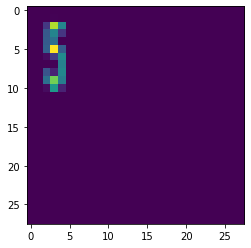

In [ ]:
from PIL import Image
import numpy as np
import PIL.ImageOps

img = Image.open("gdrive/My Drive/TestPytorch/5.png")
img = img.resize((28, 28))
img = img.convert("L")
img = PIL.ImageOps.invert(img)

plt.imshow(img)

img = np.array(img)
img = img / 255
image = torch.from_numpy(img)
image = image.float()
image = image.to(device)

res = network.forward(image.view(-1, 28*28))
res = res.to(device)
print(torch.argmax(output))